<a href="https://colab.research.google.com/github/Snowy1013z/airbnb_socal_covid/blob/main/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive/Spring2025/DSO574/HW1')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
sample = pd.read_csv('sentiment_sample.csv')
sample.head()

,id_x,year_x,month_x,host_id_x,neighbourhood,latitude,longitude,room_type,number_of_listings,average_price,average_minimum_nights,average_number_of_reviews,average_reviews_per_month,average_availability_365,description
0,30764889,2019,3,211164325,Rowland Heights,33.975150,-117.890520,Entire home/apt,1,148.0,2.0,6.0,2.61,190.0,"The house is located in Rowland Heights in LA,..."
1,19843320,2019,2,140274193,Hawthorne,33.922124,-118.319996,Private room,1,105.0,3.0,44.0,2.92,143.0,This is a great 1 bedroom (queen size bed) / 1...
2,16209058,2018,6,75219517,Westlake,34.063106,-118.266489,Entire home/apt,1,70.0,14.0,0.0,NaN,0.0,This clean 1 bedroom apartment is in the heart...
3,12369016,2018,5,66145167,San Gabriel,34.085965,-118.101096,Private room,1,234.0,1.0,0.0,NaN,15.0,"房间位于洛杉矶圣盖博市,距离夏威夷超市(越南特色超市)、九九大华超市、顺发超市(全部为华人超..."
4,33681878,2019,5,79065888,North Hollywood,34.177260,-118.363230,Entire home/apt,1,80.0,2.0,3.0,3.00,51.0,"Large sunny studio apartment, new bathroom and..."


In [ ]:
sample.dtypes

,0
id_x,int64
year_x,int64
month_x,int64
host_id_x,int64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
number_of_listings,int64
average_price,float64


In [ ]:
# prompt: convert the type of description column from onject to string

sample['description'] = sample['description'].astype(str)
sample.dtypes


,0
id_x,int64
year_x,int64
month_x,int64
host_id_x,int64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
number_of_listings,int64
average_price,float64


In [ ]:
# prompt: for column describtion, remove non english character

import re

def remove_non_english(text):
  text = re.sub(r'[^\x00-\x7F]+', '', text)
  return text

sample['description'] = sample['description'].apply(remove_non_english)


In [ ]:
sample.head()

,id_x,year_x,month_x,host_id_x,neighbourhood,latitude,longitude,room_type,number_of_listings,average_price,average_minimum_nights,average_number_of_reviews,average_reviews_per_month,average_availability_365,description
0,30764889,2019,3,211164325,Rowland Heights,33.975150,-117.890520,Entire home/apt,1,148.0,2.0,6.0,2.61,190.0,"The house is located in Rowland Heights in LA,..."
1,19843320,2019,2,140274193,Hawthorne,33.922124,-118.319996,Private room,1,105.0,3.0,44.0,2.92,143.0,This is a great 1 bedroom (queen size bed) / 1...
2,16209058,2018,6,75219517,Westlake,34.063106,-118.266489,Entire home/apt,1,70.0,14.0,0.0,NaN,0.0,This clean 1 bedroom apartment is in the heart...
3,12369016,2018,5,66145167,San Gabriel,34.085965,-118.101096,Private room,1,234.0,1.0,0.0,NaN,15.0,",()(,) CVS()5,,WiFi,,,24,"
4,33681878,2019,5,79065888,North Hollywood,34.177260,-118.363230,Entire home/apt,1,80.0,2.0,3.0,3.00,51.0,"Large sunny studio apartment, new bathroom and..."


In [ ]:
# prompt: using sample data, in column description, apply sentiment analysis

from textblob import TextBlob

def analyze_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

sample['sentiment'] = sample['description'].apply(analyze_sentiment)
sample.head()


,id_x,year_x,month_x,host_id_x,neighbourhood,latitude,longitude,room_type,number_of_listings,average_price,average_minimum_nights,average_number_of_reviews,average_reviews_per_month,average_availability_365,description,sentiment
0,30764889,2019,3,211164325,Rowland Heights,33.975150,-117.890520,Entire home/apt,1,148.0,2.0,6.0,2.61,190.0,"The house is located in Rowland Heights in LA,...",0.448052
1,19843320,2019,2,140274193,Hawthorne,33.922124,-118.319996,Private room,1,105.0,3.0,44.0,2.92,143.0,This is a great 1 bedroom (queen size bed) / 1...,0.141948
2,16209058,2018,6,75219517,Westlake,34.063106,-118.266489,Entire home/apt,1,70.0,14.0,0.0,NaN,0.0,This clean 1 bedroom apartment is in the heart...,0.455556
3,12369016,2018,5,66145167,San Gabriel,34.085965,-118.101096,Private room,1,234.0,1.0,0.0,NaN,15.0,"房间位于洛杉矶圣盖博市,距离夏威夷超市(越南特色超市)、九九大华超市、顺发超市(全部为华人超...",0.000000
4,33681878,2019,5,79065888,North Hollywood,34.177260,-118.363230,Entire home/apt,1,80.0,2.0,3.0,3.00,51.0,"Large sunny studio apartment, new bathroom and...",0.031911


In [ ]:
# prompt: drop nan in descrinsion column

sample = sample.dropna(subset=['description'])


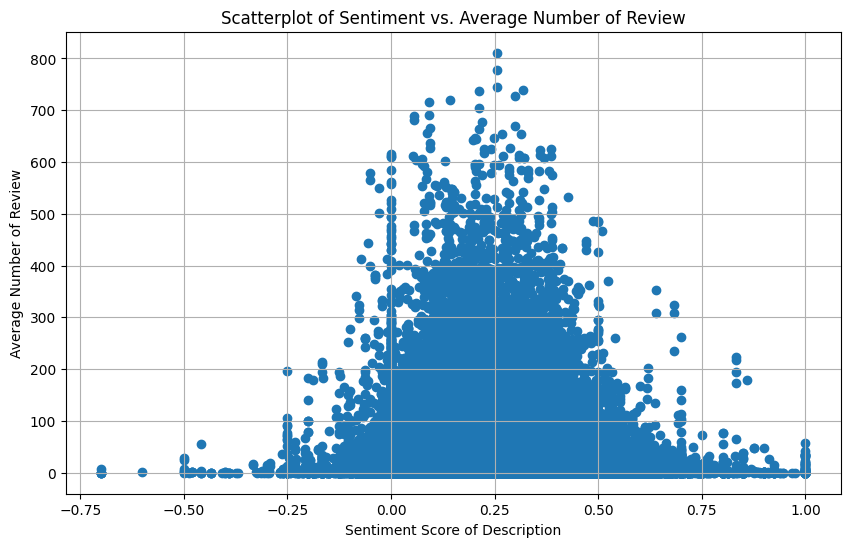

In [ ]:
# prompt: plot a scatterplot of the y=  'average number of review ' and x= 'sentiment '

plt.figure(figsize=(10, 6))
plt.scatter(sample['sentiment'], sample['average_number_of_reviews'])
plt.xlabel('Sentiment Score of Description')
plt.ylabel('Average Number of Review')
plt.title('Scatterplot of Sentiment vs. Average Number of Review')
plt.grid(True)
plt.show()


In [ ]:
# prompt: add a new column name length_des that calculate the lenghth of the description by word

sample['length_des'] = sample['description'].apply(lambda x: len(x.split()))
sample.head()

,id_x,year_x,month_x,host_id_x,neighbourhood,latitude,longitude,room_type,number_of_listings,average_price,average_minimum_nights,average_number_of_reviews,average_reviews_per_month,average_availability_365,description,sentiment,description_length,length_des
0,30764889,2019,3,211164325,Rowland Heights,33.975150,-117.890520,Entire home/apt,1,148.0,2.0,6.0,2.61,190.0,"The house is located in Rowland Heights in LA,...",0.448052,80,80
1,19843320,2019,2,140274193,Hawthorne,33.922124,-118.319996,Private room,1,105.0,3.0,44.0,2.92,143.0,This is a great 1 bedroom (queen size bed) / 1...,0.141948,175,175
2,16209058,2018,6,75219517,Westlake,34.063106,-118.266489,Entire home/apt,1,70.0,14.0,0.0,NaN,0.0,This clean 1 bedroom apartment is in the heart...,0.455556,48,48
3,12369016,2018,5,66145167,San Gabriel,34.085965,-118.101096,Private room,1,234.0,1.0,0.0,NaN,15.0,"房间位于洛杉矶圣盖博市,距离夏威夷超市(越南特色超市)、九九大华超市、顺发超市(全部为华人超...",0.000000,2,2
4,33681878,2019,5,79065888,North Hollywood,34.177260,-118.363230,Entire home/apt,1,80.0,2.0,3.0,3.00,51.0,"Large sunny studio apartment, new bathroom and...",0.031911,92,92


sentiment_category
negative     62.742103
neutral     118.172214
positive     64.619758
Name: length_des, dtype: float64


<ipython-input-44-fe788dab3633>:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sample[sample['sentiment_category'] == 'negative']['length_des'],


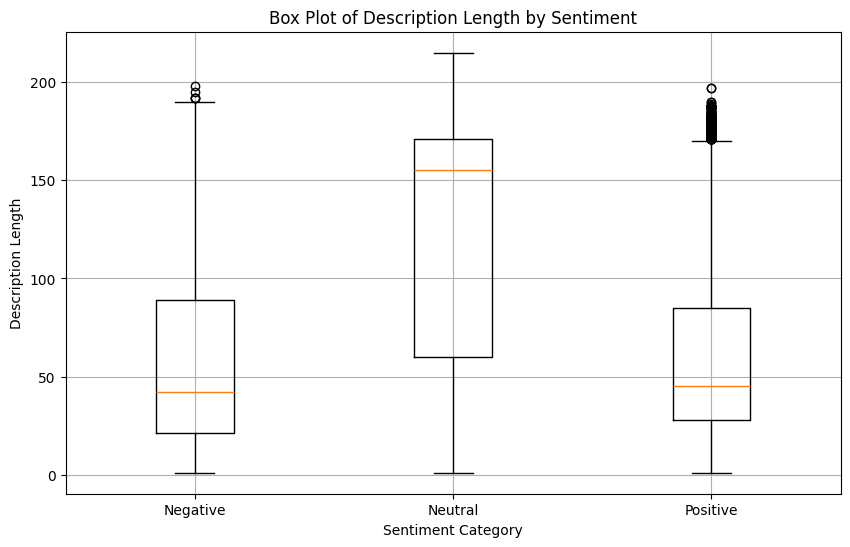

In [ ]:
# prompt: seperate the sentiment score into 3 groups, negative, neutral and high, calculate the average length_des of each group, and create. a box plot

# Define sentiment categories
def categorize_sentiment(score):
  if score < 0:
    return 'negative'
  elif score > 0.5:
    return 'positive'
  else:
    return 'neutral'

sample['sentiment_category'] = sample['sentiment'].apply(categorize_sentiment)

# Calculate average length_des for each sentiment category
average_length_by_sentiment = sample.groupby('sentiment_category')['length_des'].mean()
print(average_length_by_sentiment)

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot([sample[sample['sentiment_category'] == 'negative']['length_des'],
             sample[sample['sentiment_category'] == 'neutral']['length_des'],
             sample[sample['sentiment_category'] == 'positive']['length_des']],
            labels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment Category')
plt.ylabel('Description Length')
plt.title('Box Plot of Description Length by Sentiment')
plt.grid(True)
plt.show()


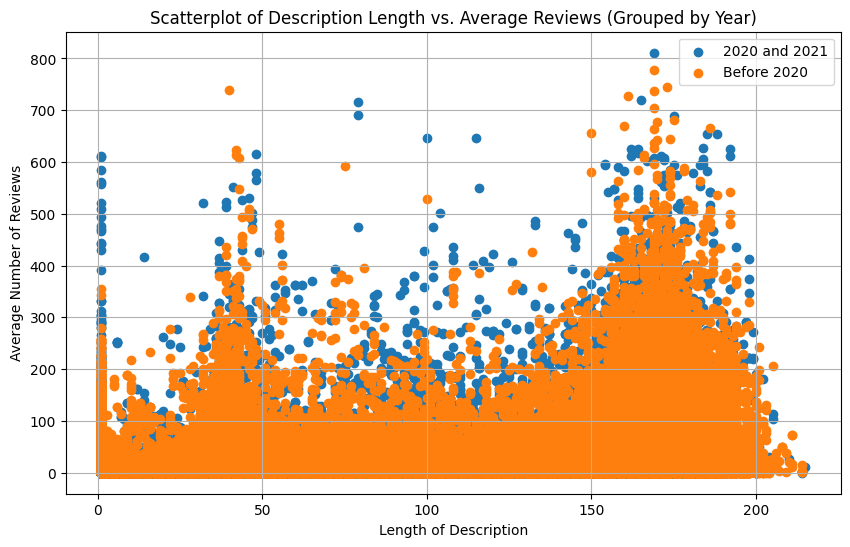

In [ ]:
# prompt: plot the scatter plot x= length_des, y = average_number_of_reviews, group by 2 groups year before 2020 and 2020 and 2021

import matplotlib.pyplot as plt

# Assuming 'sample' DataFrame is already defined from the previous code

# Create the two groups based on the year
sample['year_group'] = sample['year_x'].apply(lambda x: 'Before 2020' if x < 2020 else '2020 and 2021')

# Create the scatter plot
plt.figure(figsize=(10, 6))

for group, data in sample.groupby('year_group'):
    plt.scatter(data['length_des'], data['average_number_of_reviews'], label=group)

plt.xlabel('Length of Description')
plt.ylabel('Average Number of Reviews')
plt.title('Scatterplot of Description Length vs. Average Reviews (Grouped by Year)')
plt.legend()
plt.grid(True)
plt.show()


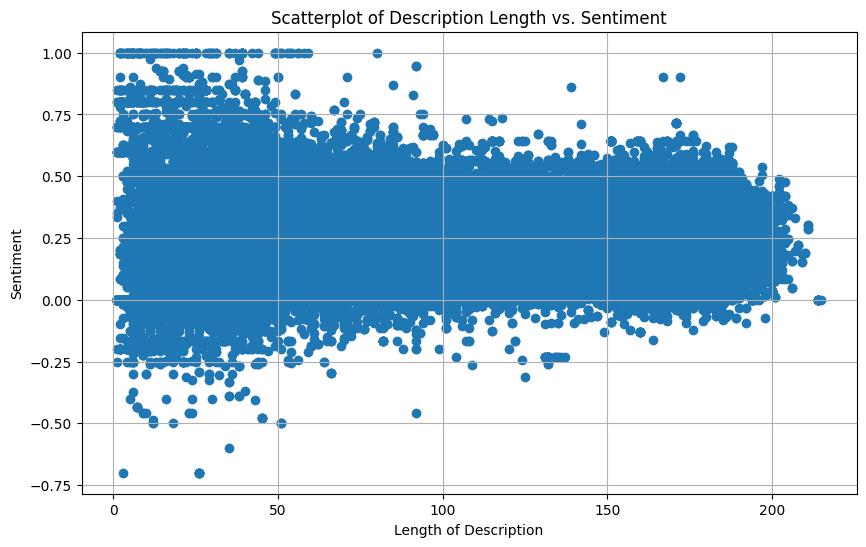

In [ ]:
# prompt: plot the scatter plot x= length_des, y =sentiment

plt.figure(figsize=(10, 6))
plt.scatter(sample['length_des'], sample['sentiment'])
plt.xlabel('Length of Description')
plt.ylabel('Sentiment')
plt.title('Scatterplot of Description Length vs. Sentiment')
plt.grid(True)
plt.show()


In [ ]:
# prompt: showing entire row of observation where sentiment =1

# Assuming 'sample' DataFrame is already created as in the previous code.

# Display rows where sentiment is equal to 1
sentiment_one_rows = sample[sample['sentiment'] == 1]
sentiment_one_rows


,id_x,year_x,month_x,host_id_x,neighbourhood,latitude,longitude,room_type,number_of_listings,average_price,average_minimum_nights,average_number_of_reviews,average_reviews_per_month,average_availability_365,description,sentiment,description_length,length_des
740,5136242,2016,7,24615600,Mid-City,34.047552,-118.350272,Shared room,1,80.0,1.0,0.0,NaN,365.0,Great Location in the mecca of L.A's Hotspots!...,1.0,35,35
1488,19879421,2019,9,40245688,University Park,34.035320,-118.287700,Private room,1,45.0,2.0,58.0,2.22,16.0,Best place to rest in DTLA.,1.0,6,6
2428,30269458,2019,2,141941016,Beverly Hills,34.064224,-118.398521,Entire home/apt,1,111.0,31.0,0.0,NaN,89.0,Best Location. 2 blocks from Rodeo Drive. Wa...,1.0,16,16
3305,4631412,2019,7,19298557,Hollywood,34.096570,-118.336900,Entire home/apt,1,128.0,30.0,32.0,0.58,347.0,This property is a perfect space for those of ...,1.0,53,53
3361,27811447,2020,11,171870188,Alhambra,34.063610,-118.148690,Private room,1,45.0,2.0,23.0,1.26,118.0,"Ecclectic house nestled on a hill, excellent v...",1.0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152297,31799884,2020,2,238310772,Reseda,34.192790,-118.524720,Private room,1,65.0,1.0,0.0,NaN,365.0,Great space for your trips in and out of LA!,1.0,10,10
153773,40312263,2020,11,311492475,Torrance,33.864570,-118.339100,Private room,1,113.0,1.0,0.0,NaN,89.0,Great place for couples!,1.0,4,4
155319,31799884,2019,6,238310772,Reseda,34.192790,-118.524720,Private room,1,65.0,1.0,0.0,NaN,365.0,Great space for your trips in and out of LA!,1.0,10,10
159684,12902288,2018,12,70682388,Del Rey,33.994189,-118.426484,Entire home/apt,1,85.0,1.0,0.0,NaN,0.0,PRIME LOCATION - 1 Bedroom apartment in the De...,1.0,39,39


In [ ]:
sentiment_o_rows = sample[sample['sentiment'] == 0]
sentiment_o_rows.shape

(22191, 18)

In [ ]:
# prompt: seperate average_number_of_reviews into 3 groups, low, average and high; calculate the average of sentiment by each group

# Calculate quantiles for average_number_of_reviews
quantiles = sample['average_number_of_reviews'].quantile([0.33, 0.66])

# Define function to assign groups
def assign_group(num_reviews):
    if num_reviews <= quantiles[0.33]:
        return 'low'
    elif num_reviews <= quantiles[0.66]:
        return 'average'
    else:
        return 'high'

# Apply the function to create the group column
sample['review_group'] = sample['average_number_of_reviews'].apply(assign_group)

# Calculate average sentiment for each group
average_sentiment_by_group = sample.groupby('review_group')['sentiment'].mean()

average_sentiment_by_group


,sentiment
review_group,
average,0.226234
high,0.224368
low,0.224747


<ipython-input-41-8f8d5654034b>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sample[sample['review_group'] == group]['average_price'] for group in groups], labels=groups)


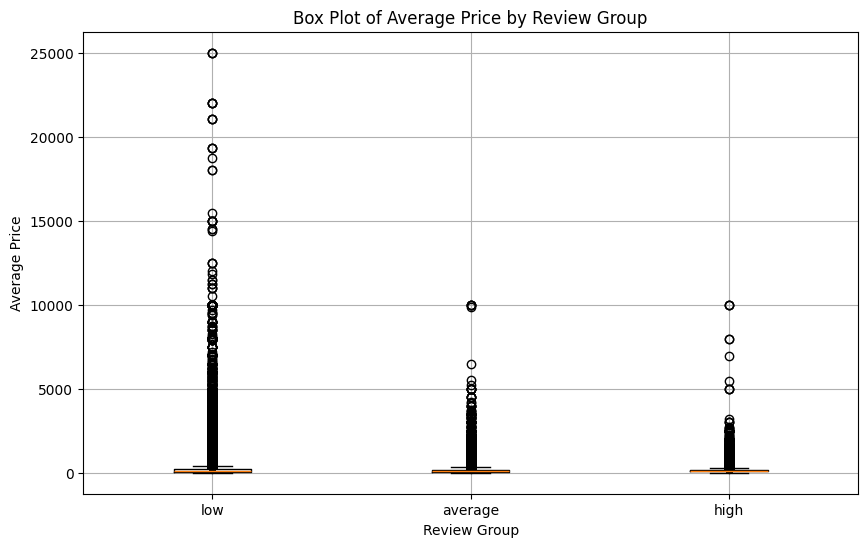

In [ ]:
# prompt: seperate average_number_of_reviews into 3 groups, low, average and high;  use a box plot to show the average price for each group, illustrate by order fro, low to high

import matplotlib.pyplot as plt

# Assuming 'sample' DataFrame and 'review_group' column are already created

# Create the box plot
plt.figure(figsize=(10, 6))
groups = ['low', 'average', 'high']
plt.boxplot([sample[sample['review_group'] == group]['average_price'] for group in groups], labels=groups)
plt.xlabel('Review Group')
plt.ylabel('Average Price')
plt.title('Box Plot of Average Price by Review Group')
plt.grid(True)
plt.show()
